# Data Understanding and Data Preparation Exercise
### Courtesy of Intel Advanced Analytics



In this exercise you will explore data that is related with direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
in order to access if the product (bank term deposit) would be (or not) subscribed. 

Data source:
 [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
 
 Once finishing the first question submit this notebook. The next exercise will be opened. Submit the notebook with the second question and so on..
 
 Feel free to consult each other, ask Google or ask us via 'Help request' in Hive.
 Good luck!

# Q1


## Familiarizing yourself with the data

In [1]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
 
sns.set(rc={"figure.figsize": (5,5)})
sns.set_style("white")

1) Download the 'bank-full_2016.csv' database to a local directory, and load it into a DataFrame object: https://drive.google.com/open?id=0B31PIhEId-dvS2lUZ3dWaTR0YWs

In [2]:
bank_df = pd.read_csv("./bank-full_2016.csv")

2) Explore your data a bit:
- What are the dimensions of the table?
- What are the different attributes in it?
- Return a frequency table of the "outcome" category in the table - i.e return all the possible values in that category, and how many times each value is present in the table.
- Display the first 5 rows of the table.

In [3]:
print bank_df.shape
# 45211 rows, 17 columns
print bank_df.columns


(45211, 17)
Index([u'age', u'job', u'marital', u'education', u'default_credit', u'balance',
       u'housing_loan', u'personal_loan', u'contact', u'day', u'month',
       u'duration', u'campaign', u'days_from_last_contact',
       u'previous_campaign_contacts', u'previous_campaign_outcome',
       u'outcome'],
      dtype='object')


In [4]:
bank_df.outcome.value_counts()

no     39922
yes     5289
Name: outcome, dtype: int64

In [5]:
bank_df.head()

age           job  marital  education default_credit  balance housing_loan  \
0   58    management  married   tertiary             no     2143          yes   
1   44    technician   single  secondary             no       29          yes   
2   33  entrepreneur  married  secondary             no        2          yes   
3   47   blue-collar  married    unknown             no     1506          yes   
4   33       unknown   single    unknown             no        1           no   

  personal_loan  contact  day month  duration  campaign  \
0            no  unknown    5   may       261         1   
1            no  unknown    5   may       151         1   
2           yes  unknown    5   may        76         1   
3            no  unknown    5   may        92         1   
4            no  unknown    5   may       198         1   

   days_from_last_contact  previous_campaign_contacts  \
0                     NaN                           0   
1                     NaN                           0   
2                     NaN                           0   
3                     NaN                           0   
4                     NaN                           0   

  previous_campaign_outcome outcome  
0                   unknown      no  
1                   unknown      no  
2                   unknown      no  
3                   unknown      no  
4                   unknown      no

3) What is the data type of each attribute in the table?

In [6]:
print bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age                           45211 non-null int64
job                           45211 non-null object
marital                       45211 non-null object
education                     45211 non-null object
default_credit                45211 non-null object
balance                       45211 non-null int64
housing_loan                  45211 non-null object
personal_loan                 45211 non-null object
contact                       45211 non-null object
day                           45211 non-null int64
month                         45211 non-null object
duration                      45211 non-null int64
campaign                      45211 non-null int64
days_from_last_contact        8257 non-null float64
previous_campaign_contacts    45211 non-null int64
previous_campaign_outcome     45211 non-null object
outcome                       45211 non-null object
dtypes: float

## Manipulating DataFrames

1) Add to the table a Boolean attribute called 'isContactKnown'. It should say for each element if the 'contact' category is 'unknown' or is it 'cellular'/'telephone'

In [7]:
bank_df["is_contact_known"] = bank_df.contact.apply(lambda val: 0 if val == "unknown" else 1)

In [8]:
bank_df.is_contact_known.value_counts()

1    32191
0    13020
Name: is_contact_known, dtype: int64

2) Change the type of the 'campaign' attribute to Categorical data.

In [9]:
bank_df.campaign = bank_df.campaign.astype("category")

## Data Distribution

1) What is the range of values for each attribute in the table? what are the mean, std, median values for each category? Hint: You can do all this with one command!

In [10]:
bank_df.describe()

age        balance           day      duration  \
count  45211.000000   45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080   
std       10.618762    3044.765829      8.322476    257.527812   
min       18.000000   -8019.000000      1.000000      0.000000   
25%       33.000000      72.000000      8.000000    103.000000   
50%       39.000000     448.000000     16.000000    180.000000   
75%       48.000000    1428.000000     21.000000    319.000000   
max       95.000000  102127.000000     31.000000   4918.000000   

       days_from_last_contact  previous_campaign_contacts  is_contact_known  
count             8257.000000                45211.000000      45211.000000  
mean               224.577692                    0.580323          0.712017  
std                115.344035                    2.303441          0.452828  
min                  1.000000                    0.000000          0.000000  
25%                133.000000                    0.000000          0.000000  
50%                194.000000                    0.000000          1.000000  
75%                327.000000                    0.000000          1.000000  
max                871.000000                  275.000000          1.000000

2) Plot a histogram of the 'balance' attribute and a boxplot of the 'age' attribute.

Text(0.5,1,u'age boxplot')

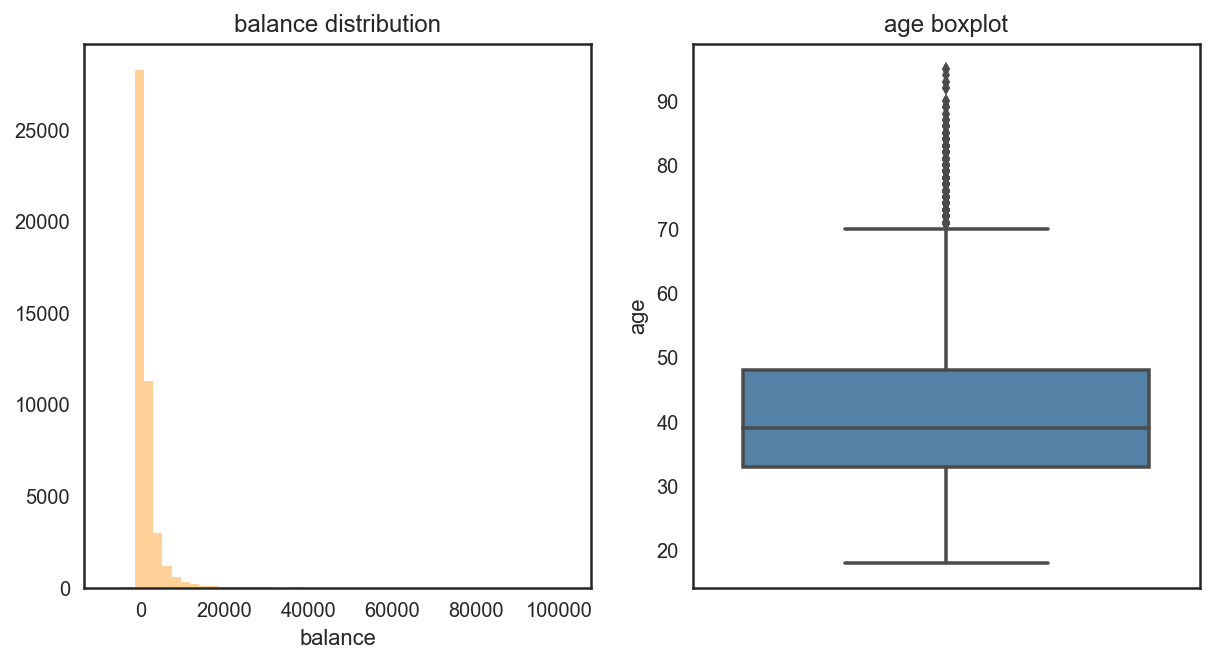

In [40]:
fig, axes = plt.subplots(nrows = 1,ncols = 2, figsize = (10,5))
sns.distplot(bank_df.balance, bins = 50, ax = axes[0], color = "darkorange", kde = False).set_title("balance distribution")
sns.boxplot(bank_df.age, ax = axes[1], color = "steelblue", orient = "v").set_title("age boxplot")

3) Plot separately the distributions of balance values for people with negative outcome and positive outcomes. Are they different? If so, how?

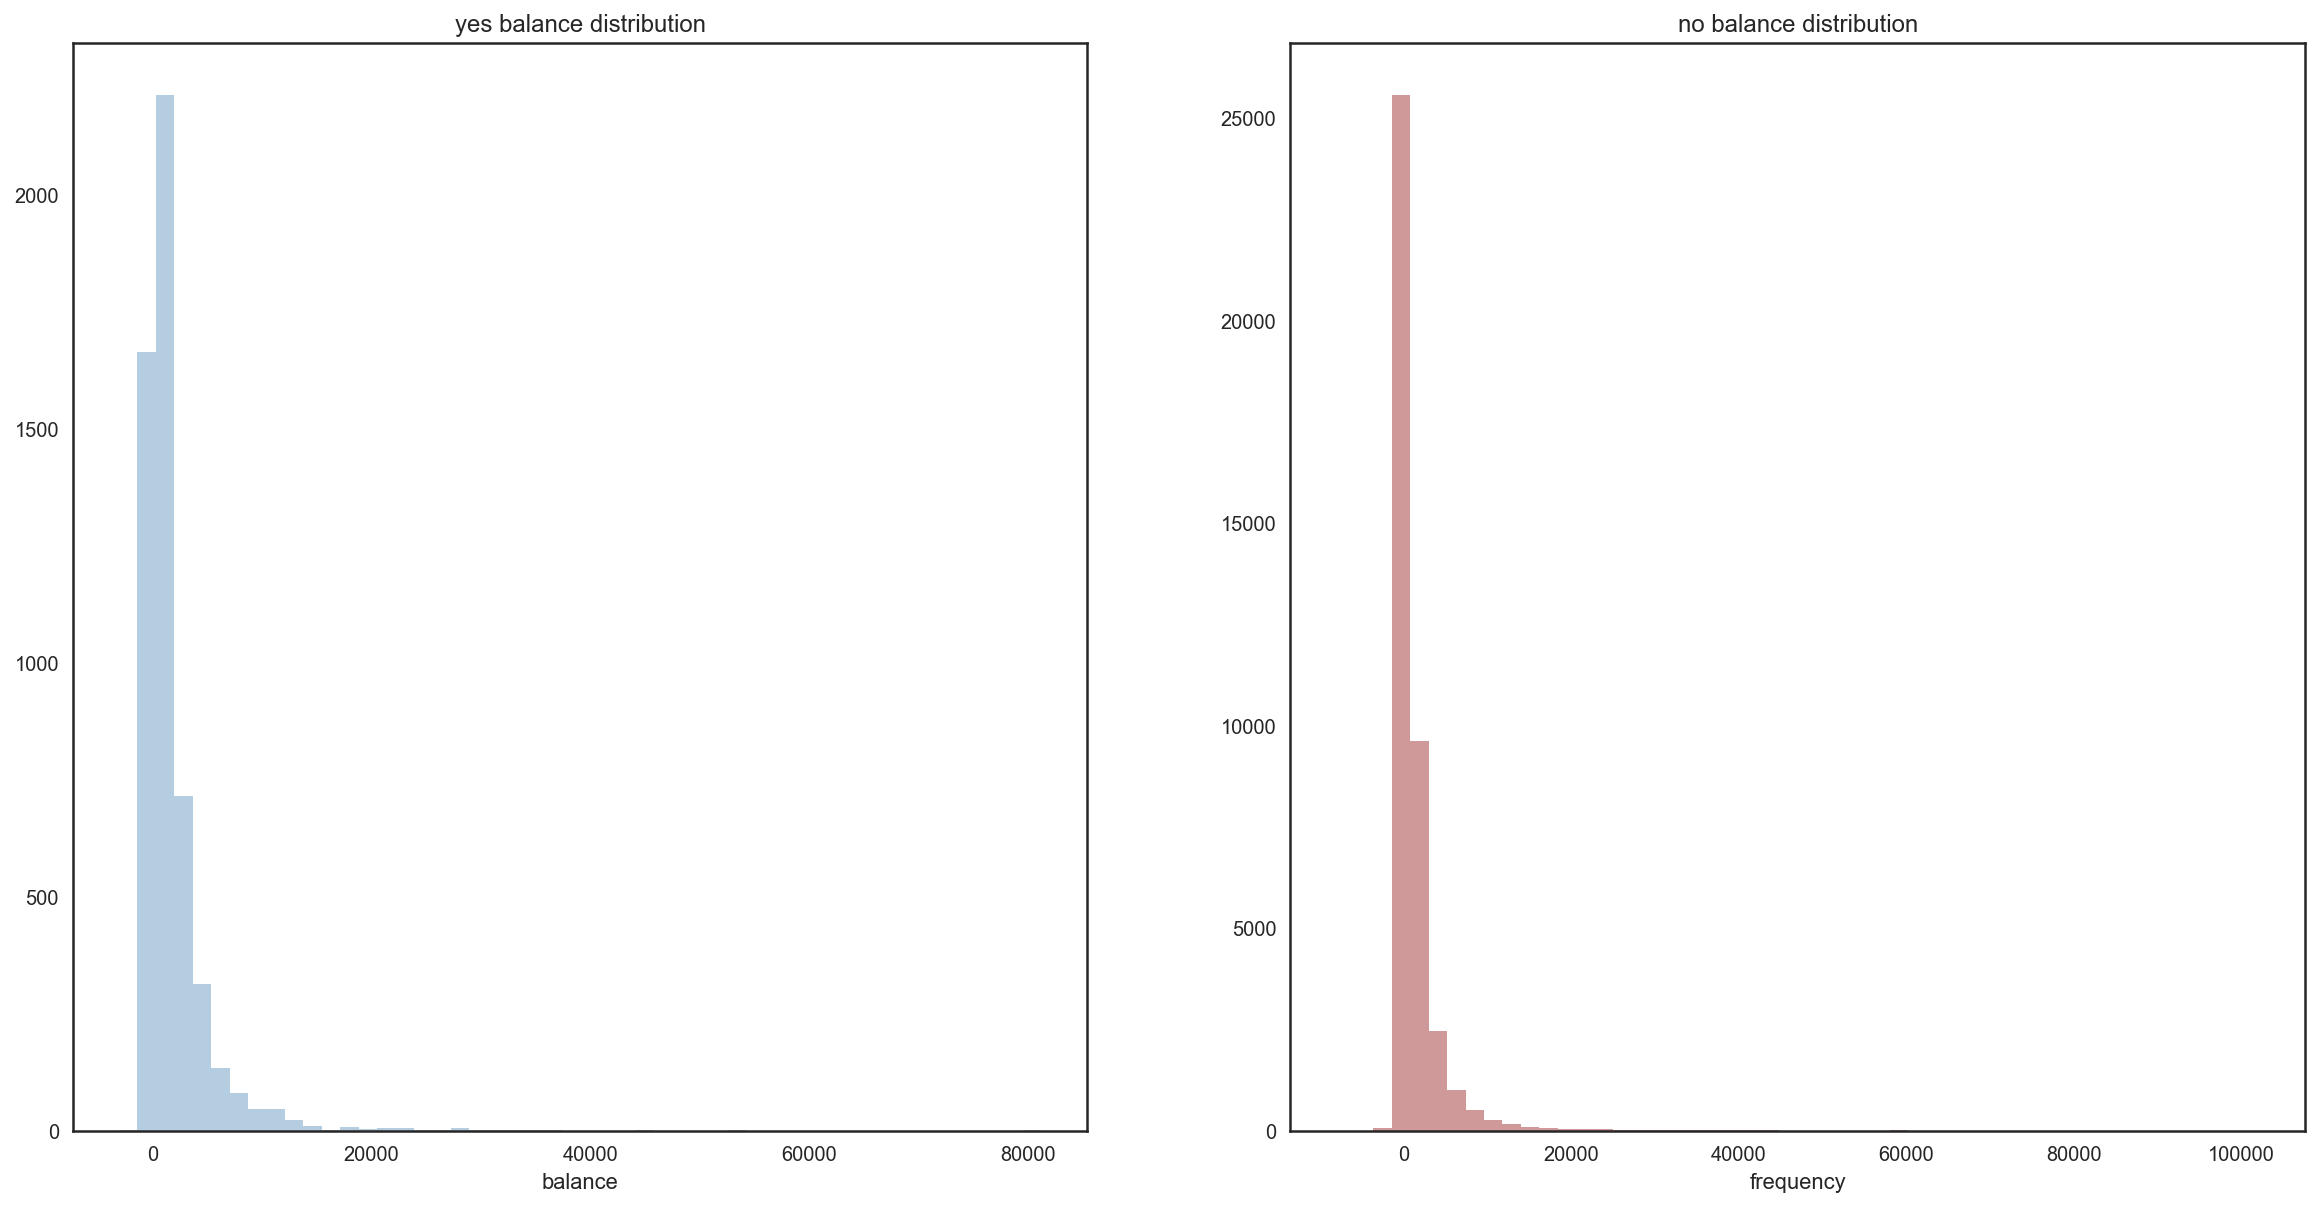

In [49]:
sns.set_style("white")
fig, axes = plt.subplots(1,2, figsize=(20,10))

yes_balance = bank_df[bank_df.outcome == "yes"].balance
no_balance = bank_df[bank_df.outcome == "no"].balance

sns.distplot(yes_balance, bins = 50, ax = axes[0], kde = False, color = "steelblue").set_title("yes balance distribution")
sns.distplot(no_balance, bins = 50, ax = axes[1], kde = False, color = "darkred").set_title("no balance distribution")
plt.show()
#ax[0].set_ylabel("frequency")




# Q2

## Missing Values

1) Which of the attributes have missing values? How many?

In [54]:
bank_df.isnull().sum()

age                               0
job                               0
marital                           0
education                         0
default_credit                    0
balance                           0
housing_loan                      0
personal_loan                     0
contact                           0
day                               0
month                             0
duration                          0
campaign                          0
days_from_last_contact        36954
previous_campaign_contacts        0
previous_campaign_outcome         0
outcome                           0
is_contact_known                  0
dtype: int64

2) Create another dataframe, which doesn't include any people with 'contact' which is 'cellular' or 'telephone'

In [57]:
no_contact_df = bank_df[(bank_df.contact != "cellular") & (bank_df.contact != "telephone")]

3) Look at the missing values in the 'days_from_last_contact' attribute. What do you think these missing values might represent? Can you find support in the table for your assumption? Hint: The attribute names have a meaning.

In [82]:
no_contact_df.days_from_last_contact.isnull().sum()
# this could mean that either no one has contacted them, or that the data was not recorded
# verified below

12950

In [83]:
bank_df[(bank_df.days_from_last_contact.isnull()) & (bank_df.previous_campaign_contacts != 0)]

Empty DataFrame
Columns: [age, job, marital, education, default_credit, balance, housing_loan, personal_loan, contact, day, month, duration, campaign, days_from_last_contact, previous_campaign_contacts, previous_campaign_outcome, outcome, is_contact_known]
Index: []

## Discretization

In class, you've seen three methods of data discretization, and we will focus on two of them - Equal-width (distance) and Equal-depth (frequency).

1) Discretize the balance attribute to 7 intervals using equal-width discretization, and plot the frequency table for them.

Text(0,0.5,u'frequency')

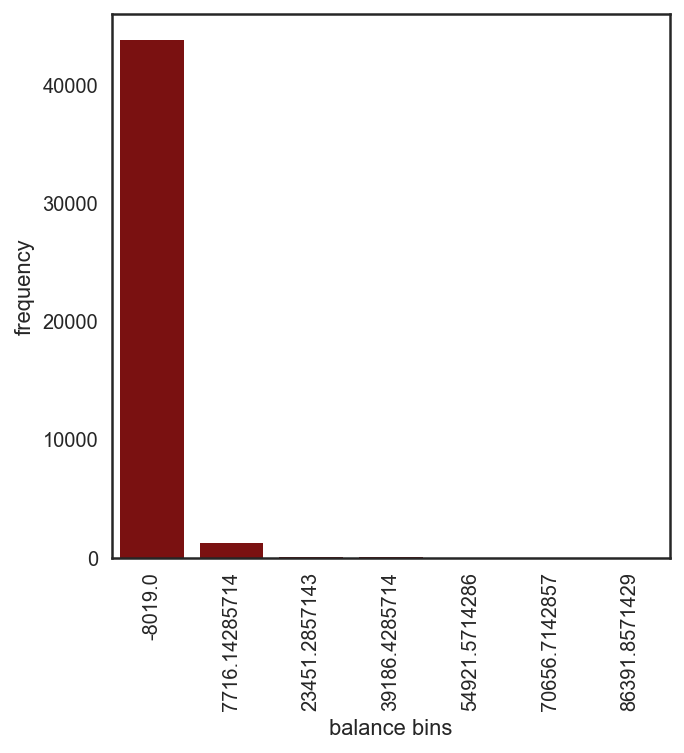

In [135]:
binned_balance = np.histogram(bank_df.balance,bins = 7)
freqs = pd.Series(binned_balance[0])
bins = pd.Series(binned_balance[1])

ax = sns.barplot(bins[:-1],freqs, color = "darkred")
ax.set_xticklabels(bins[:-1], rotation=90)
ax.set_xlabel("balance bins")
ax.set_ylabel("frequency")

2) Discretize the age attribute into 6 intervals using equal-depth discretization, and plot the frequency table for them.

Text(0,0.5,u'frequency')

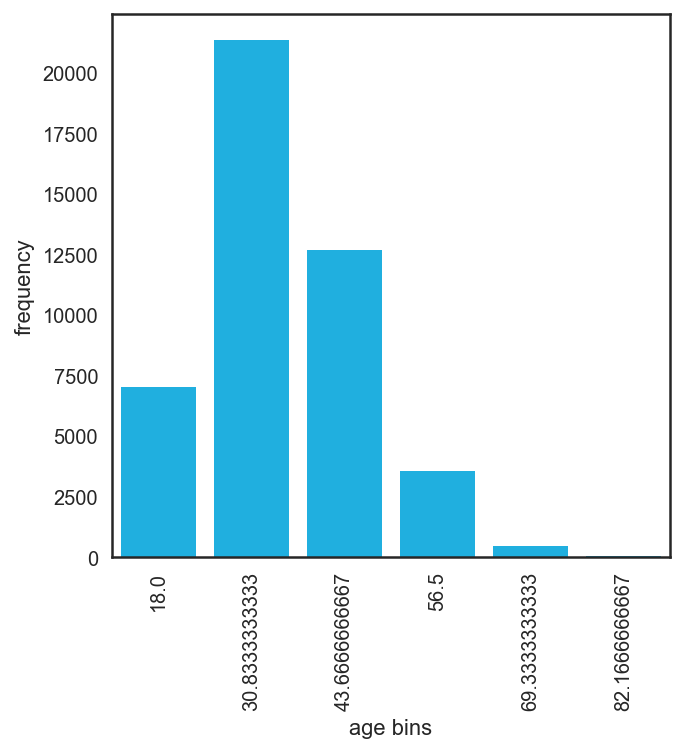

In [139]:
binned_balance = np.histogram(bank_df.age,bins = 6)
freqs = pd.Series(binned_balance[0])
bins = pd.Series(binned_balance[1])

ax = sns.barplot(bins[:-1],freqs, color = "deepskyblue")
ax.set_xticklabels(bins[:-1], rotation=90)
ax.set_xlabel("age bins")
ax.set_ylabel("frequency")

3) Propose a way to further discretize the Month column.

In [ ]:
# by week

# Q3

## Correlation

1) Calculate the pearson and spearman correlation between age and balance.

In [142]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

print "pearson correlation: ", pearsonr(bank_df.age, bank_df.balance)
print "spearman correlation: ",spearmanr(bank_df.age, bank_df.balance)

pearson correlation:  (0.097782739371347474, 1.84698749485881e-96)
spearman correlation:  SpearmanrResult(correlation=0.096380304771986003, pvalue=9.3610663053773154e-94)


2) Calculate the full pearson correlation matrix for all the numeric columns in the data.

In [146]:
bank_df.corr(method = "pearson")

age   balance       day  duration  \
age                         1.000000  0.097783 -0.009120 -0.004648   
balance                     0.097783  1.000000  0.004503  0.021560   
day                        -0.009120  0.004503  1.000000 -0.030206   
duration                   -0.004648  0.021560 -0.030206  1.000000   
days_from_last_contact     -0.107863 -0.108122 -0.090095 -0.024407   
previous_campaign_contacts  0.001288  0.016674 -0.051710  0.001203   
is_contact_known            0.020132  0.037331  0.034103  0.014379   

                            days_from_last_contact  \
age                                      -0.107863   
balance                                  -0.108122   
day                                      -0.090095   
duration                                 -0.024407   
days_from_last_contact                    1.000000   
previous_campaign_contacts               -0.021885   
is_contact_known                         -0.162032   

                            previous_campaign_contacts  is_contact_known  
age                                           0.001288          0.020132  
balance                                       0.016674          0.037331  
day                                          -0.051710          0.034103  
duration                                      0.001203          0.014379  
days_from_last_contact                       -0.021885         -0.162032  
previous_campaign_contacts                    1.000000          0.154162  
is_contact_known                              0.154162          1.000000

## Mutual Information

Calcalate the entropy of each of the attributes in the data. Which has the biggest entropy?

In [151]:
from scipy.stats import entropy
for col in bank_df:
    try:
        ent = entropy(bank_df[col])
        print col, ":", ent
    except:
        continue

age : 10.6864320566
balance : -inf
day : 10.5665671412
duration : 10.3561322187
campaign : 10.3524938916
days_from_last_contact : -inf
previous_campaign_contacts : 8.61795943551
is_contact_known : 10.3794421894


Which attribute has the highest Mutual Information with the 'outcome' attribute?

# Q4

## Outliers

Does the campaign column in the table have any outliers? Support your claim with a relevant plot.

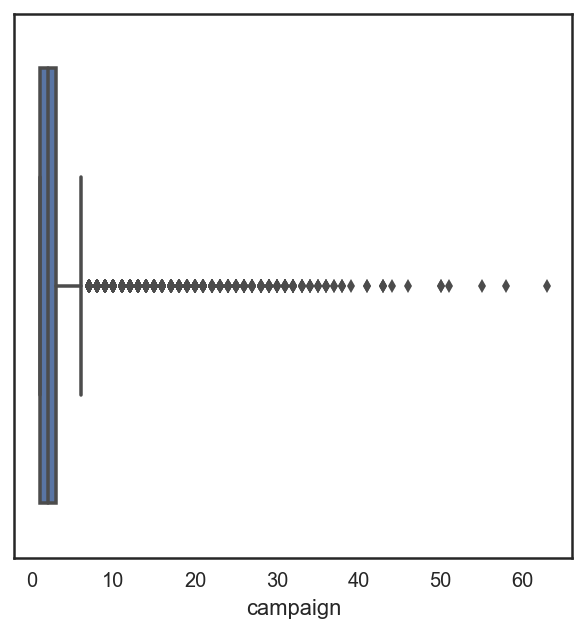

In [157]:
# yes lots of outliers, 
sns.boxplot(bank_df.campaign)

## Normalization

Think of an appropriate normalization method and normalize the days_from_last_contact column in the table. Why did you choose this method?

In [177]:
# days is a positive metric, we need a normalization method that will be appropriate for that

normalized_days = (bank_df.days_from_last_contact - bank_df.days_from_last_contact.mean()) / bank_df.days_from_last_contact.std()

In [179]:
normalized_days.value_counts().head()

-0.369136    167
-1.149411    147
-1.158081    126
-0.360467    126
-0.377806    117
Name: days_from_last_contact, dtype: int64